<a href="https://colab.research.google.com/github/neworderby/Python_EDA_ML_DataViz/blob/main/German_Credit_Python_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Датасет про кредиты и пользователей немецкого банка дефолт = 0 - вернул все долги; 1 - не вернул взято с kaggle.com**

#1. Загрузка данных

https://drive.google.com/file/d/17DOtiFQBciWnQgqCcwLE31ZXYgYIaFG9/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np

In [92]:
! gdown --id 17DOtiFQBciWnQgqCcwLE31ZXYgYIaFG9

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17DOtiFQBciWnQgqCcwLE31ZXYgYIaFG9
To: /content/german-credit.csv
100% 50.5k/50.5k [00:00<00:00, 59.9MB/s]


In [93]:
df = pd.read_csv('/content/german-credit.csv') #лучше короткие названия датафреймов

#2. Предобработка датасета

In [94]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


In [95]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [96]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1


In [97]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'default'],
      dtype='object')

In [98]:
df.columns = df.columns.str.replace(' ','_').str.lower() #объединение двух методов
df.head(1)

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0


#3. Анализ датасета

In [99]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


Переименование столбцов

Смотрим пропуски

In [100]:
df.isna().mean()

age                 0.000
sex                 0.000
job                 0.000
housing             0.000
saving_accounts     0.183
checking_account    0.394
credit_amount       0.000
duration            0.000
purpose             0.000
default             0.000
dtype: float64

Делаем техническую замену пропусков

In [101]:
df['saving_accounts'].fillna('no_info',inplace=True)

In [102]:
df.isna().mean()

age                 0.000
sex                 0.000
job                 0.000
housing             0.000
saving_accounts     0.000
checking_account    0.394
credit_amount       0.000
duration            0.000
purpose             0.000
default             0.000
dtype: float64

In [103]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,no_info,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [104]:
df['age_group_2'] = pd.qcut(df['age'],5)

In [105]:
df.groupby('age_group_2')['default'].agg(['count','mean'])

,count,mean
age_group_2,,
"(18.999, 26.0]",240,0.391667
"(26.0, 30.0]",171,0.315789
"(30.0, 36.0]",216,0.259259
"(36.0, 45.0]",187,0.262032
"(45.0, 75.0]",186,0.252688


<Axes: xlabel='age_group_2'>

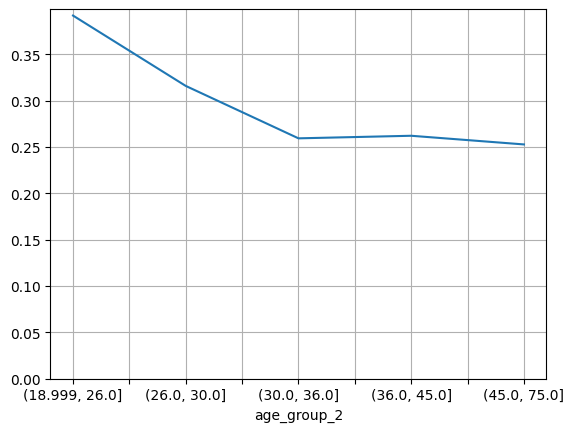

In [106]:
df.groupby('age_group_2')['default'].mean().plot(ylim=0,grid=True)

<Axes: xlabel='age', ylabel='credit_amount'>

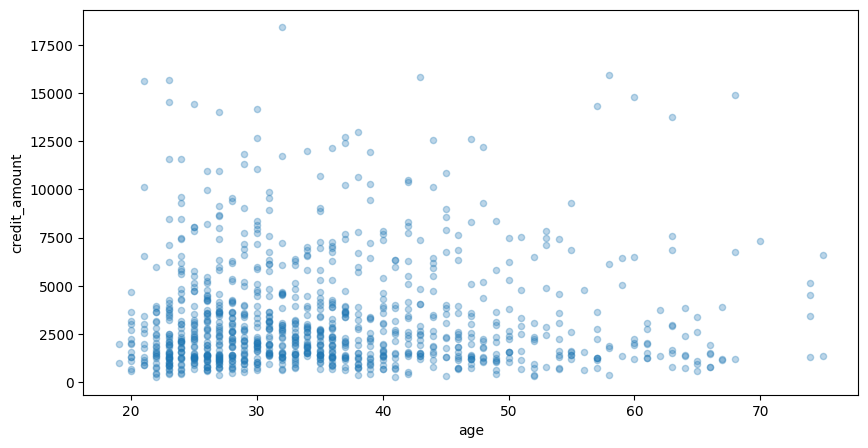

In [59]:
df.plot(x='age',y='credit_amount',kind='scatter',figsize=(10,5),alpha=0.3)

С увеличением возраста, % дефолтников и сумма кредита снижается

In [107]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group_2
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]"
2,49,male,1,own,little,NaN,2096,12,education,0,"(45.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]"


In [108]:
df.groupby('sex')['default'].agg(['count','mean'])

,count,mean
sex,,
female,310,0.351613
male,690,0.276812


In [109]:
df.groupby(['age_group_2','sex'])['default'].agg(['count','mean'])

count      mean
age_group_2    sex                    
(18.999, 26.0] female    125  0.432000
               male      115  0.347826
(26.0, 30.0]   female     57  0.368421
               male      114  0.289474
(30.0, 36.0]   female     43  0.395349
               male      173  0.225434
(36.0, 45.0]   female     39  0.205128
               male      148  0.277027
(45.0, 75.0]   female     46  0.195652
               male      140  0.271429

В среднем возрасте у female проссрочка наоборот меньше

In [110]:
df.groupby('sex')['age'].agg(['count','mean','median'])

,count,mean,median
sex,,,
female,310,32.803226,29.0
male,690,36.778261,35.0


Средний возраст заемщиков-женщин на 4 года меньше. Медиана определяет, что также женщины попадают в более рискованную категорию  в силу возраста(дефолт среди них больше. Влияние другой переменной-возраст). Выборка перекошена. Мужчин в 2 раза больше женщин.

Уменьшаем бины до 3 возрастных групп:

In [111]:
df['age_group_3'] = pd.qcut(df['age'],3)

Смотрим в разрезе пола и возраста:

In [112]:
df.groupby(['age_group_3','sex'])['default'].agg(['count','mean'])

count      mean
age_group_3    sex                    
(18.999, 28.0] female    154  0.409091
               male      180  0.327778
(28.0, 38.0]   female     83  0.385542
               male      263  0.235741
(38.0, 75.0]   female     73  0.191781
               male      247  0.283401

Первичный вывод подтверждается. В молодом и среднем возрасте женщины хуже платят за кредит. В зрелом - наоборот.

Смотрим данные по критерию Job:

In [113]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group_2,age_group_3
0,67,male,2,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]"
2,49,male,1,own,little,NaN,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]"


Делаем словарь с кодировкой job:

In [114]:
job_dict = {0 : 'unskilled and non-resident',
            1 : 'unskilled and resident',
            2 : 'skilled',
            3 : 'highly skilled'}

Заменяем цифровую кодировку значениями из словаря:

In [115]:
df['job']=df['job'].map(job_dict)

In [118]:
df.groupby('job')['default'].agg(['count','mean']) #можно сделать .reset_index()

,count,mean
job,,
highly skilled,148,0.344595
skilled,630,0.295238
unskilled and non-resident,22,0.318182
unskilled and resident,200,0.280000


0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

In [119]:
df.groupby(['job','sex'])['default'].agg(['count','mean'])

count      mean
job                        sex                    
highly skilled             female     37  0.432432
                           male      111  0.315315
skilled                    female    197  0.335025
                           male      433  0.277136
unskilled and non-resident female     12  0.416667
                           male       10  0.200000
unskilled and resident     female     64  0.343750
                           male      136  0.250000

Значение имеет пол. Перекос по sex. Гипотеза подтверждается. Глянем данные таже в разрезе age_group

In [120]:
df.groupby(['job','age_group_3','sex'])['default'].agg(['count','mean'])

count      mean
job                        age_group_3    sex                    
highly skilled             (18.999, 28.0] female     10  0.500000
                                          male       11  0.545455
                           (28.0, 38.0]   female     13  0.461538
                                          male       55  0.163636
                           (38.0, 75.0]   female     14  0.357143
                                          male       45  0.444444
skilled                    (18.999, 28.0] female    112  0.375000
                                          male      128  0.328125
                           (28.0, 38.0]   female     54  0.333333
                                          male      166  0.246988
                           (38.0, 75.0]   female     31  0.193548
                                          male      139  0.266187
unskilled and non-resident (18.999, 28.0] female      6  0.500000
                                          male        3  0.666667
                           (28.0, 38.0]   female      3  0.333333
                                          male        1  0.000000
                           (38.0, 75.0]   female      3  0.333333
                                          male        6  0.000000
unskilled and resident     (18.999, 28.0] female     26  0.500000
                                          male       38  0.236842
                           (28.0, 38.0]   female     13  0.538462
                                          male       41  0.292683
                           (38.0, 75.0]   female     25  0.080000
                                          male       57  0.228070

In [121]:
df.groupby(['job','age_group_3'])['default'].agg(['count','mean'])

count      mean
job                        age_group_3                    
highly skilled             (18.999, 28.0]     21  0.523810
                           (28.0, 38.0]       68  0.220588
                           (38.0, 75.0]       59  0.423729
skilled                    (18.999, 28.0]    240  0.350000
                           (28.0, 38.0]      220  0.268182
                           (38.0, 75.0]      170  0.252941
unskilled and non-resident (18.999, 28.0]      9  0.555556
                           (28.0, 38.0]        4  0.250000
                           (38.0, 75.0]        9  0.111111
unskilled and resident     (18.999, 28.0]     64  0.343750
                           (28.0, 38.0]       54  0.351852
                           (38.0, 75.0]       82  0.182927

В skilled много молодых и это влияет на уровень default

In [122]:
df.groupby('job')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
job,,,
highly skilled,148,5435.493243,4459.0
skilled,630,3070.965079,2324.0
unskilled and non-resident,22,2745.136364,1416.0
unskilled and resident,200,2358.520000,1622.0


highly skilled берут слишком большие кредиты

Но также влияет размер кредита. В hs и s размер кредита выше, чем в un. Посмотрием влияние размера кредита на default вообще

In [123]:
df['credit_amount_group6'] = pd.qcut(df['credit_amount'],5)

In [124]:
df.groupby('credit_amount_group6')['default'].agg(['count','mean'])

,count,mean
credit_amount_group6,,
"(249.999, 1262.0]",201,0.303483
"(1262.0, 1906.8]",199,0.241206
"(1906.8, 2852.4]",200,0.270000
"(2852.4, 4720.0]",200,0.260000
"(4720.0, 18424.0]",200,0.425000


На высоких кредитах большая проссрочка

In [125]:
df.groupby(['credit_amount_group6','sex'])['default'].agg(['count','mean'])

count      mean
credit_amount_group6 sex                    
(249.999, 1262.0]    female     80  0.362500
                     male      121  0.264463
(1262.0, 1906.8]     female     71  0.309859
                     male      128  0.203125
(1906.8, 2852.4]     female     53  0.301887
                     male      147  0.258503
(2852.4, 4720.0]     female     58  0.275862
                     male      142  0.253521
(4720.0, 18424.0]    female     48  0.541667
                     male      152  0.388158

Да, чем больше кредит, те выше default rate

In [126]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,age_group_2,age_group_3,credit_amount_group6
0,67,male,skilled,own,no_info,little,1169,6,radio/TV,0,"(45.0, 75.0]","(38.0, 75.0]","(249.999, 1262.0]"
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,1,"(18.999, 26.0]","(18.999, 28.0]","(4720.0, 18424.0]"
2,49,male,unskilled and resident,own,little,NaN,2096,12,education,0,"(45.0, 75.0]","(38.0, 75.0]","(1906.8, 2852.4]"
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,0,"(36.0, 45.0]","(38.0, 75.0]","(4720.0, 18424.0]"
4,53,male,skilled,free,little,little,4870,24,car,1,"(45.0, 75.0]","(38.0, 75.0]","(4720.0, 18424.0]"


Смотрим данные по housing:

In [127]:
df.groupby('housing')['default'].agg(['count','mean'])

,count,mean
housing,,
free,108,0.407407
own,713,0.260870
rent,179,0.391061


Если дом в собственности, то default rate гораздо ниже

<Axes: xlabel='credit_amount_group6'>

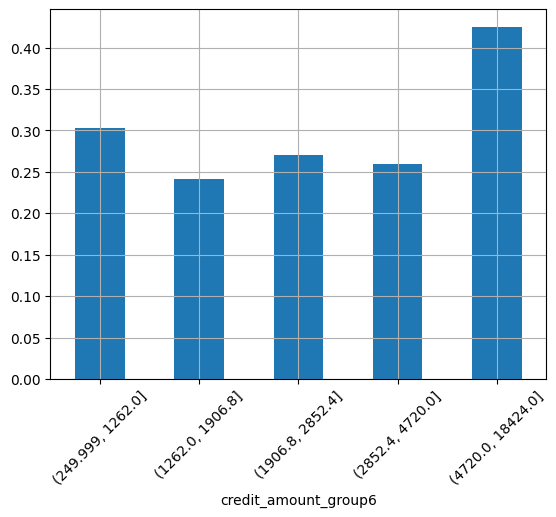

In [130]:
(df.groupby('credit_amount_group6')
['default']
.mean()).plot(rot=45,ylim=0,grid=True,kind='bar')

default rate выше при больших суммах кредита

Дополнительно посмотрим распределение размера кредита по checking_account и age:

Зеленая линия - медиана. Синяя нижняя - 25% перцентиль. Верхняя синяя - 75% перцентиль. Усы - максимумы, минимумы. За ними - выбросы:

<Axes: title={'center': 'credit_amount'}, xlabel='checking_account'>

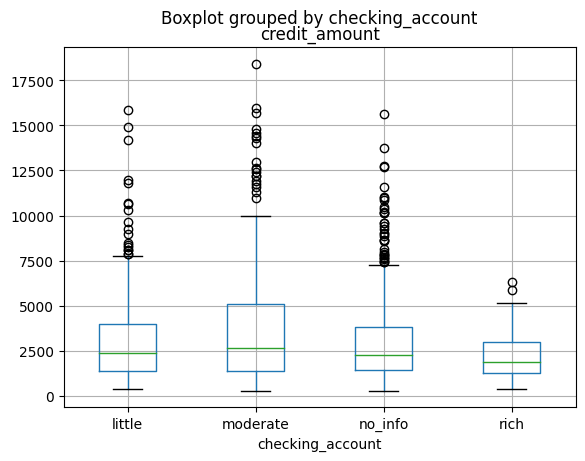

In [58]:
df.boxplot('credit_amount',by='checking_account')